<a href="https://colab.research.google.com/github/colacan100/Game_Production_Plan_Project/blob/main/Game_Design_Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Game Production Plan Project**


---


**Topic : 다음 분기에 어떤 게임을 설계해야 할까**


---



Essential Content
> 1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

Feature
> 1. Name : 게임의 이름
2. Platform : 게임이 지원되는 플랫폼의 이름
3. Year : 게임이 출시된 연도
4. Genre : 게임의 장르
5. Publisher : 게임을 제작한 회사
6. NA_Sales : 북미지역에서의 출고량
7. EU_Sales : 유럽지역에서의 출고량
8. JP_Sales : 일본지역에서의 출고량
9. Other_Sales : 기타지역에서의 출고량

Content
<article>핵심적인 사항부터 세부적으로 좁혀나가는 방식으로 기획</article>

> 1. 연도별 게임의 트렌드 -----> 현재 트렌드에 맞는 장르를 선택
2. 플랫폼 별 선호하는 게임의 장르 -----> 어떠한 플랫폼에 게임을 출시할지 결정
3. 선택한 플랫폼에서 지역별 출고량 조사 -----> 어떤 지역에 홍보를 집중할 지 결정
4. 위 조건에 맞는 게임회사 조사


Explain
> 1. Introduction : 우선 어떤 게임회사에 들어갔는지는 모르지만 새로운 게임을 기획한다는 것을 보면 현재 진행하고 있는 게임 콘텐츠가 없는 신생회사라고 볼 수 있을 것 같습니다. 게임 회사별로 각자의 색상이 있고 그 기준에서 크게 벗어나지 않기 때문이죠 (FPS장르에 특화된 회사, AOS장르에 특화된 회사와 같이 말입니다.) 따라서 단순히 출고량을 따라가는 분석보다, 신생회사가 가장 효율적으로 수익을 올릴 수 있는 방법에 초점을 맞춘 분석을 진행했습니다.
2. Year, Genre: 저는 넓은 범주부터 시작하여 세부적인 사항까지 선택하는 과정을 거쳐보려고 합니다. Feature중에서 가장 범주가 넓은 것은 게임이 출시된 년도라고 볼 수 있습니다. Steam과 같은 곳의 게임통계나 Twitch와 같은 개인방송 송출 사이트를 보면 시기에 따라서 유행하는 게임의 장르가 다른 것을 볼 수 있기 때문입니다. 가장 기본적이면서도 중요한 Feature라고 볼 수 있습니다.
3. Platform: 그 다음으로 고려할 사항은 플랫폼입니다. 현재 게임 플랫폼의 종류는 다양화 되어있습니다. 물론 여러 플랫폼을 이용하는 사용자들도 있지만 선호하는 장르의 게임이 많은 플랫폼만을 이용하는 사용자도 있을 것입니다. 이를 고려하여 현재 유행하는 장르를 많이 포함한 플랫폼을 선택할 것입니다.
4. Sales : 플랫폼을 선택한 후에는 지역별 출고량을 조사한 후 어떤 지역에 홍보를 집중할 것일지 생각할 것입니다. 물론 모든 지역에 홍보하는 것도 좋습니다. 하지만 한정된 자본을 통해서 최대한의 이익을 이끌어내는 것이 회사의 목적이므로 핵심적으로 투자할 지역을 선택합니다.
5. Publisher : 우리는 이렇게 최종적으로 투자할 지역까지 이끌어 냈습니다. 하지만 같은 장르라 하더라도 게임의 형식이 다르고 (예를 들어 배틀그라운드와 에이펙스레전드 같은 경우가 있겠네요. 같은 생존 FPS 장르의 게임이지만 형식이 다르죠) 게임사마다 홍보방식도 다릅니다. 따라서 우리는 Filtering한 Data에서 많은 게임을 소유하고 있는 게임사를 참조하여 게임을 만들고 홍보할 것입니다.
6. Conclusion : 결과적으로 우리는 어떤 장르의 게임을 만들고 어떤 형식으로 게임을 설계하고 홍보를 어떻게 할지에 대한 결과를 얻을 수 있습니다.(모든 feature의 내용을 사용했습니다. 데이터를 빠짐없이 효율적으로 이용한다는 점에서도 만족스럽네요.) 즉,가장 효율적으로 수익을 창출할 수 있다는 것입니다.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/vgames2.csv')

df = df.drop(['Unnamed: 0'], axis=1)
# Genre의 Null 값은 분석을 위해 Drop
df = df.dropna()
# Year 전처리
df['Year'] = df['Year'].apply(np.int64)
for i in range(17):
  df.loc[df['Year'] == i, 'Year'] = 2000+i
df.loc[df['Year'] < 100, 'Year'] += 1900

# 데이터가 적은 Year Drop
df_idx1 = df[df['Year']==2017].index
df_idx2 = df[df['Year']==2020].index
df = df.drop(df_idx1)
df = df.drop(df_idx2)

# 지역별 Sales 전처리
df['NA_Sales'] = df['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

# Sales 합 Column 추가
df['Sales_sum'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [2]:
# 지역에 따라서 선호하는 게임 장르가 다를까

locate_Genre_NA = df.groupby(['Genre'])['NA_Sales'].sum()
locate_Genre_EU = df.groupby(['Genre'])['EU_Sales'].sum()
locate_Genre_JP = df.groupby(['Genre'])['JP_Sales'].sum()
locate_Genre_Other = df.groupby(['Genre'])['Other_Sales'].sum()
locate_Genre = pd.DataFrame()
locate_Genre = locate_Genre.append(locate_Genre_NA)
locate_Genre = locate_Genre.append(locate_Genre_EU)
locate_Genre = locate_Genre.append(locate_Genre_JP)
locate_Genre = locate_Genre.append(locate_Genre_Other)
locate_Genre = locate_Genre.T
locate_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,858.75,513.64,156.59,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.89,56.73
Shooter,574.48,310.23,38.18,101.86
Simulation,181.16,112.99,63.54,31.30


In [3]:
#!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

import matplotlib.pyplot as plt
import seaborn as sns

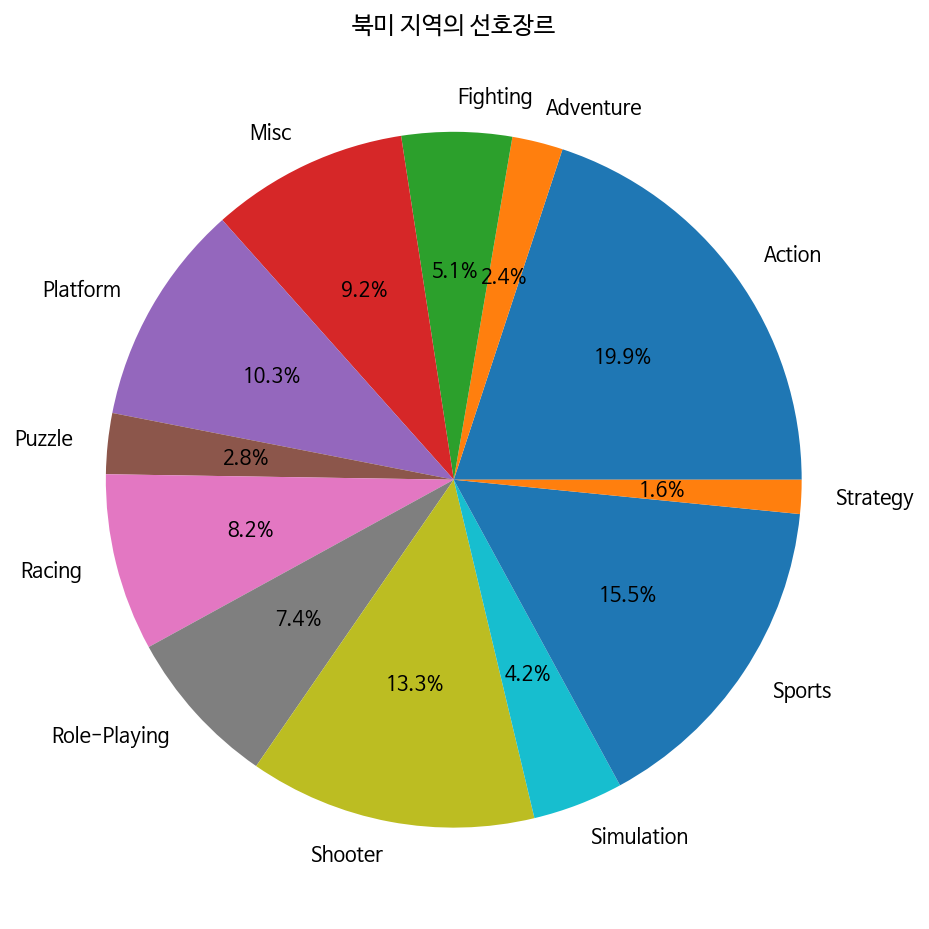

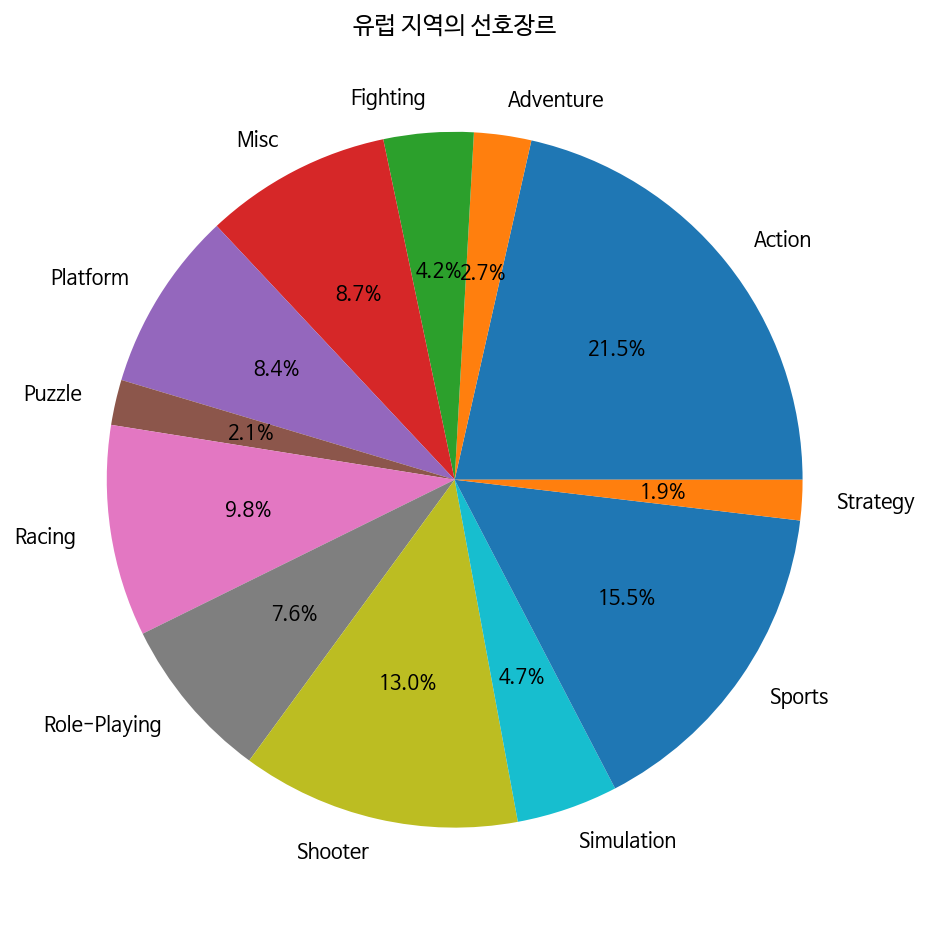

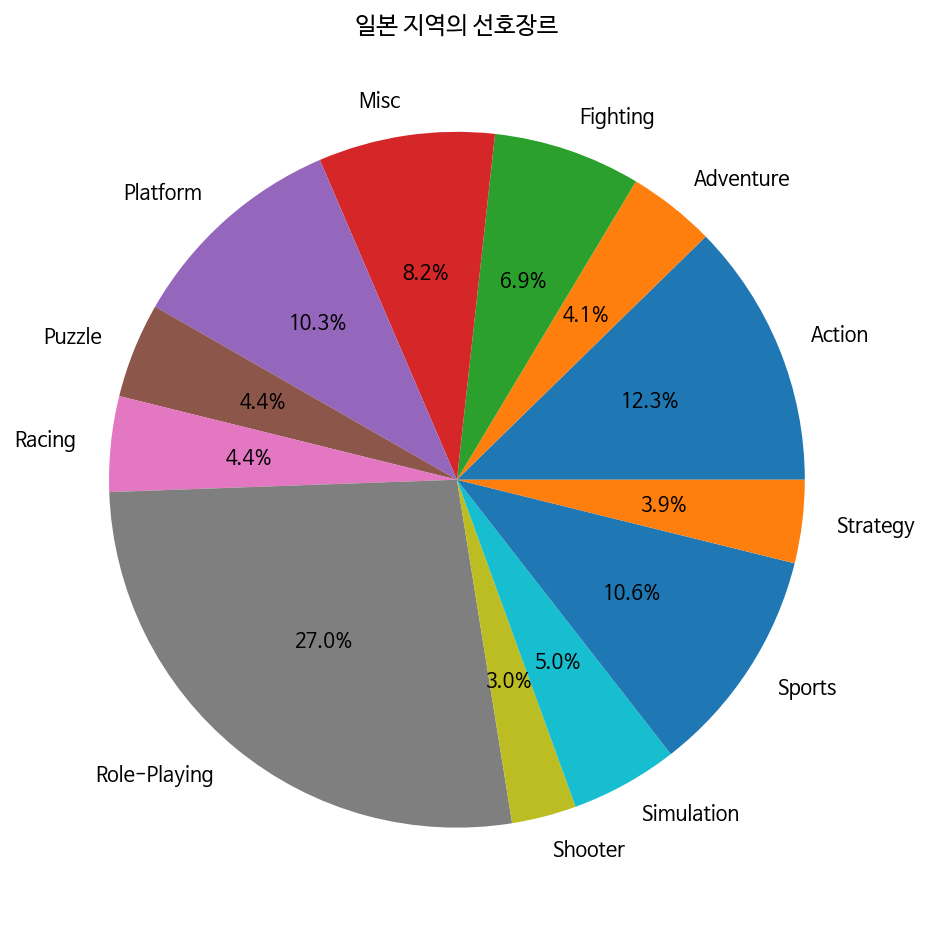

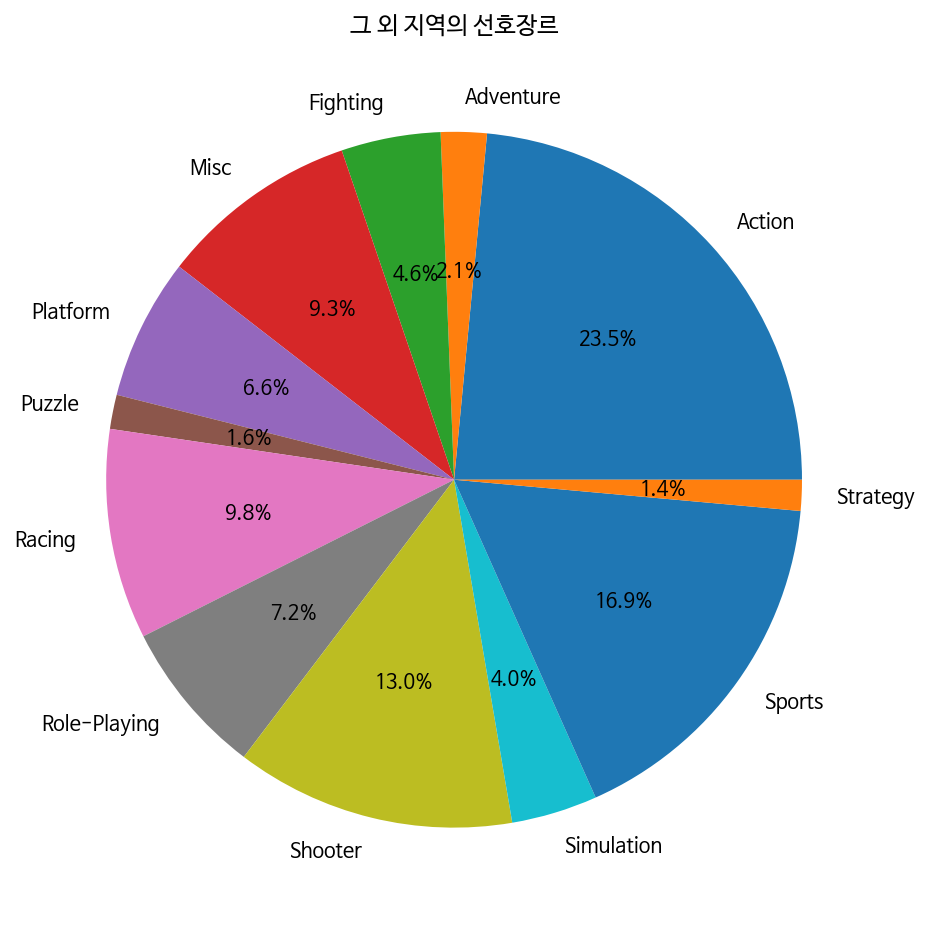

In [4]:
pie_locate = locate_Genre.T
pie_label = pie_locate.columns.values.tolist()
plt.figure(figsize=(8, 8))
plt.pie(pie_locate.loc['NA_Sales'], labels=pie_label, autopct='%.1f%%')
plt.title('북미 지역의 선호장르')

plt.figure(figsize=(8, 8))
plt.pie(pie_locate.loc['EU_Sales'], labels=pie_label, autopct='%.1f%%')
plt.title('유럽 지역의 선호장르')

plt.figure(figsize=(8, 8))
plt.pie(pie_locate.loc['JP_Sales'], labels=pie_label, autopct='%.1f%%')
plt.title('일본 지역의 선호장르')

plt.figure(figsize=(8, 8))
plt.pie(pie_locate.loc['Other_Sales'], labels=pie_label, autopct='%.1f%%')
plt.title('그 외 지역의 선호장르')

plt.show()

In [5]:
from scipy.stats import chi2_contingency
# 카이제곱 검정으로 판단
# 독립변수 : 장르
# 종속변수 : 국가별 판매량
# 귀무가설 : 비율 차이가 없다. (=지역마다 선호하는 장르가 같다.)
chi2_val, p, dof, expected= chi2_contingency(locate_Genre, correction=False)
if(p<0.05) : 
    print('p value:', p,"\n"+'귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 지역마다 선호하는 장르가 같다.')

# 일본을 제외한 경우
locate_Genre2 = locate_Genre.drop(['JP_Sales'], axis=1)
chi2_val, p, dof, expected= chi2_contingency(locate_Genre2, correction=False)
if(p<0.05) : 
    print('일본을 제외한 p value:', p,"\n"+'귀무가설을 기각한다. 일본을 제외한 지역마다 선호하는 장르가 다르다.')
else :
    print('p value:', p,"\n"+'귀무가설을 기각하지 못한다. 일본을 제외한 지역마다 선호하는 장르가 같다.')

p value: 9.964279787302075e-123 
귀무가설을 기각한다. 지역마다 선호하는 장르가 다르다.
일본을 제외한 p value: 0.024080297712670003 
귀무가설을 기각한다. 일본을 제외한 지역마다 선호하는 장르가 다르다.


In [6]:
# 연도별 게임의 트렌드가 있을까 (공급)

# 연도별 장르 갯수 추출
df_year_genre = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')
# 장르 중 최댓값 추출
year_genre_bool = df_year_genre.groupby(['Year'])['Count'].transform(max) == df_year_genre['Count']
year_max_genre = df_year_genre[year_genre_bool].reset_index(drop=True)
# 중복값 제거
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','Count']).reset_index(drop=True)
year_max_genre.rename(index = {'Count': 'Sales'}, inplace = True)
year_max_genre

,Year,Genre,Count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1985,Platform,4
6,1986,Action,6
7,1987,Sports,4
8,1988,Platform,4
9,1989,Puzzle,5


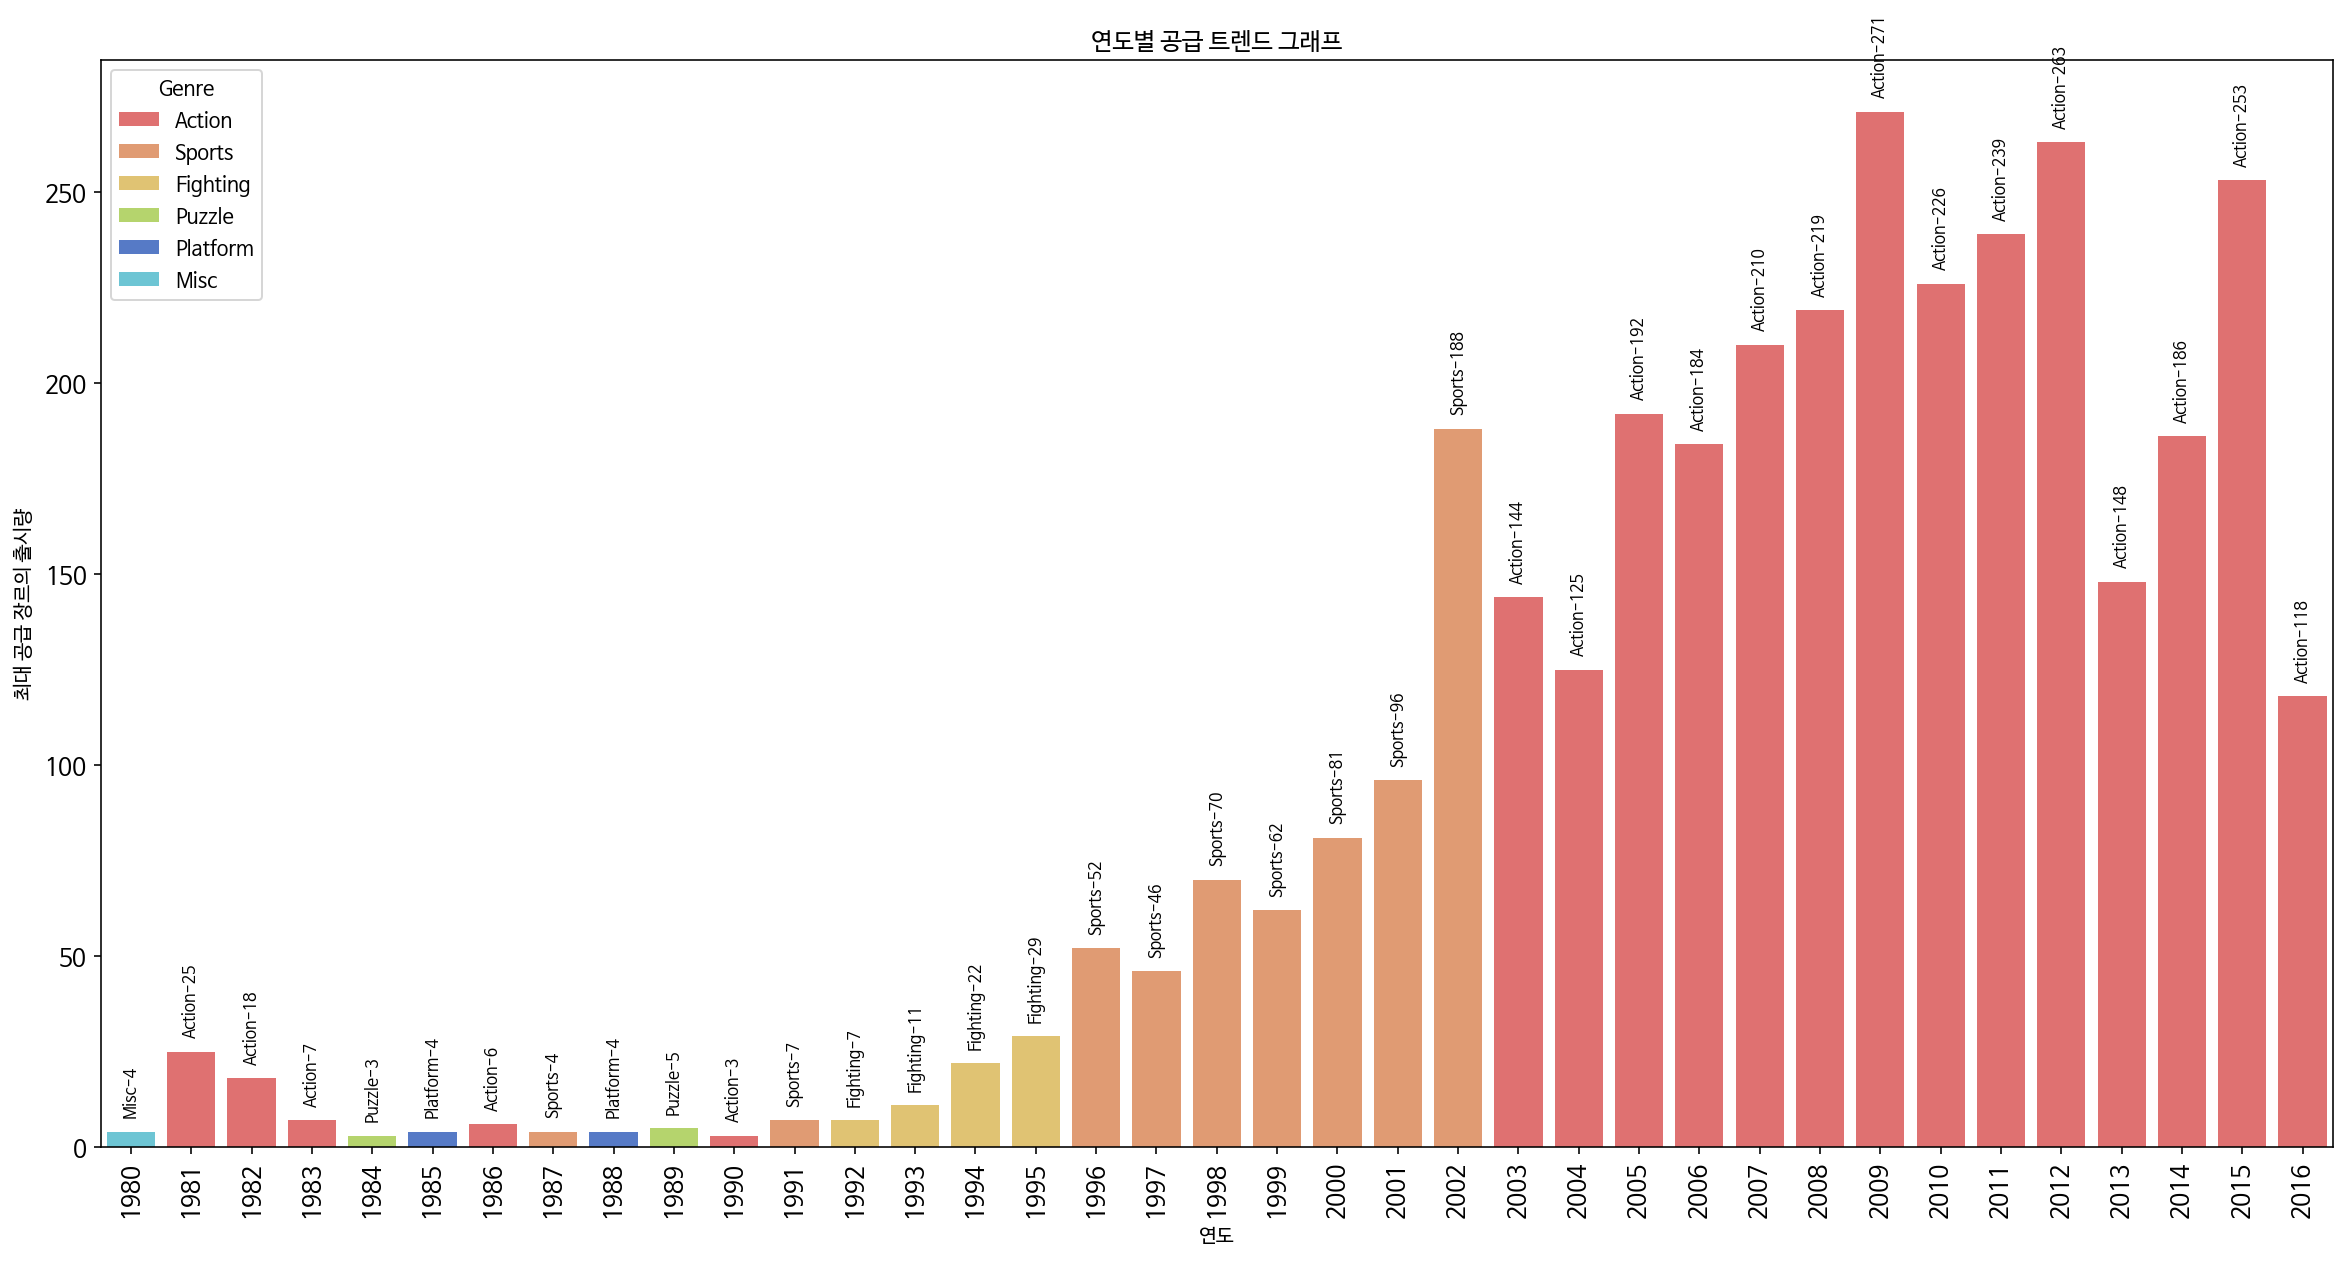

In [7]:
# 연도별 공급 트렌드 그래프: 연도별 흐름을 보여주기 위해서 barplot을 이용했다.
import numpy as np, scipy.stats as st
genre = year_max_genre['Genre'].values
plt.figure(figsize=(20,10))

colors = ["#F15F5F"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Action'])
colors = ["#F29661"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Sports'])
colors = ["#F2CB61"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Fighting'])
colors = ["#BCE55C"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Puzzle'])
colors = ["#4374D9"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Platform'])
colors = ["#5CD1E5"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Count',hue='Genre', data=year_max_genre,hue_order=['Misc'])
colors = ["#6799FF"]


cnt = 0
for value in year_max_genre['Count']:
    year_barplot.text(x=cnt, y=value + 5, s=str(genre[cnt] + '-' + str(value)),
            color='black', size=8, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.title('연도별 공급 트렌드 그래프')
plt.xlabel('연도')
plt.ylabel('최대 공급 장르의 출시량')
plt.show()
# 공급 부분에서 최근 트렌드는 Action 장르임을 알 수 있다.

In [8]:
# 연도별 게임의 트렌드가 있을까 (수요)

# 연도별 장르 총매출 추출
year_max_sales = df.groupby(['Year', 'Genre'])['Sales_sum'].sum().reset_index()
# 장르 중 최댓값 추출
year_sales_bool = year_max_sales.groupby(['Year'])['Sales_sum'].transform(max) == year_max_sales['Sales_sum']
year_max_sales = year_max_sales[year_sales_bool].reset_index(drop=True)
year_max_sales

,Year,Genre,Sales_sum
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


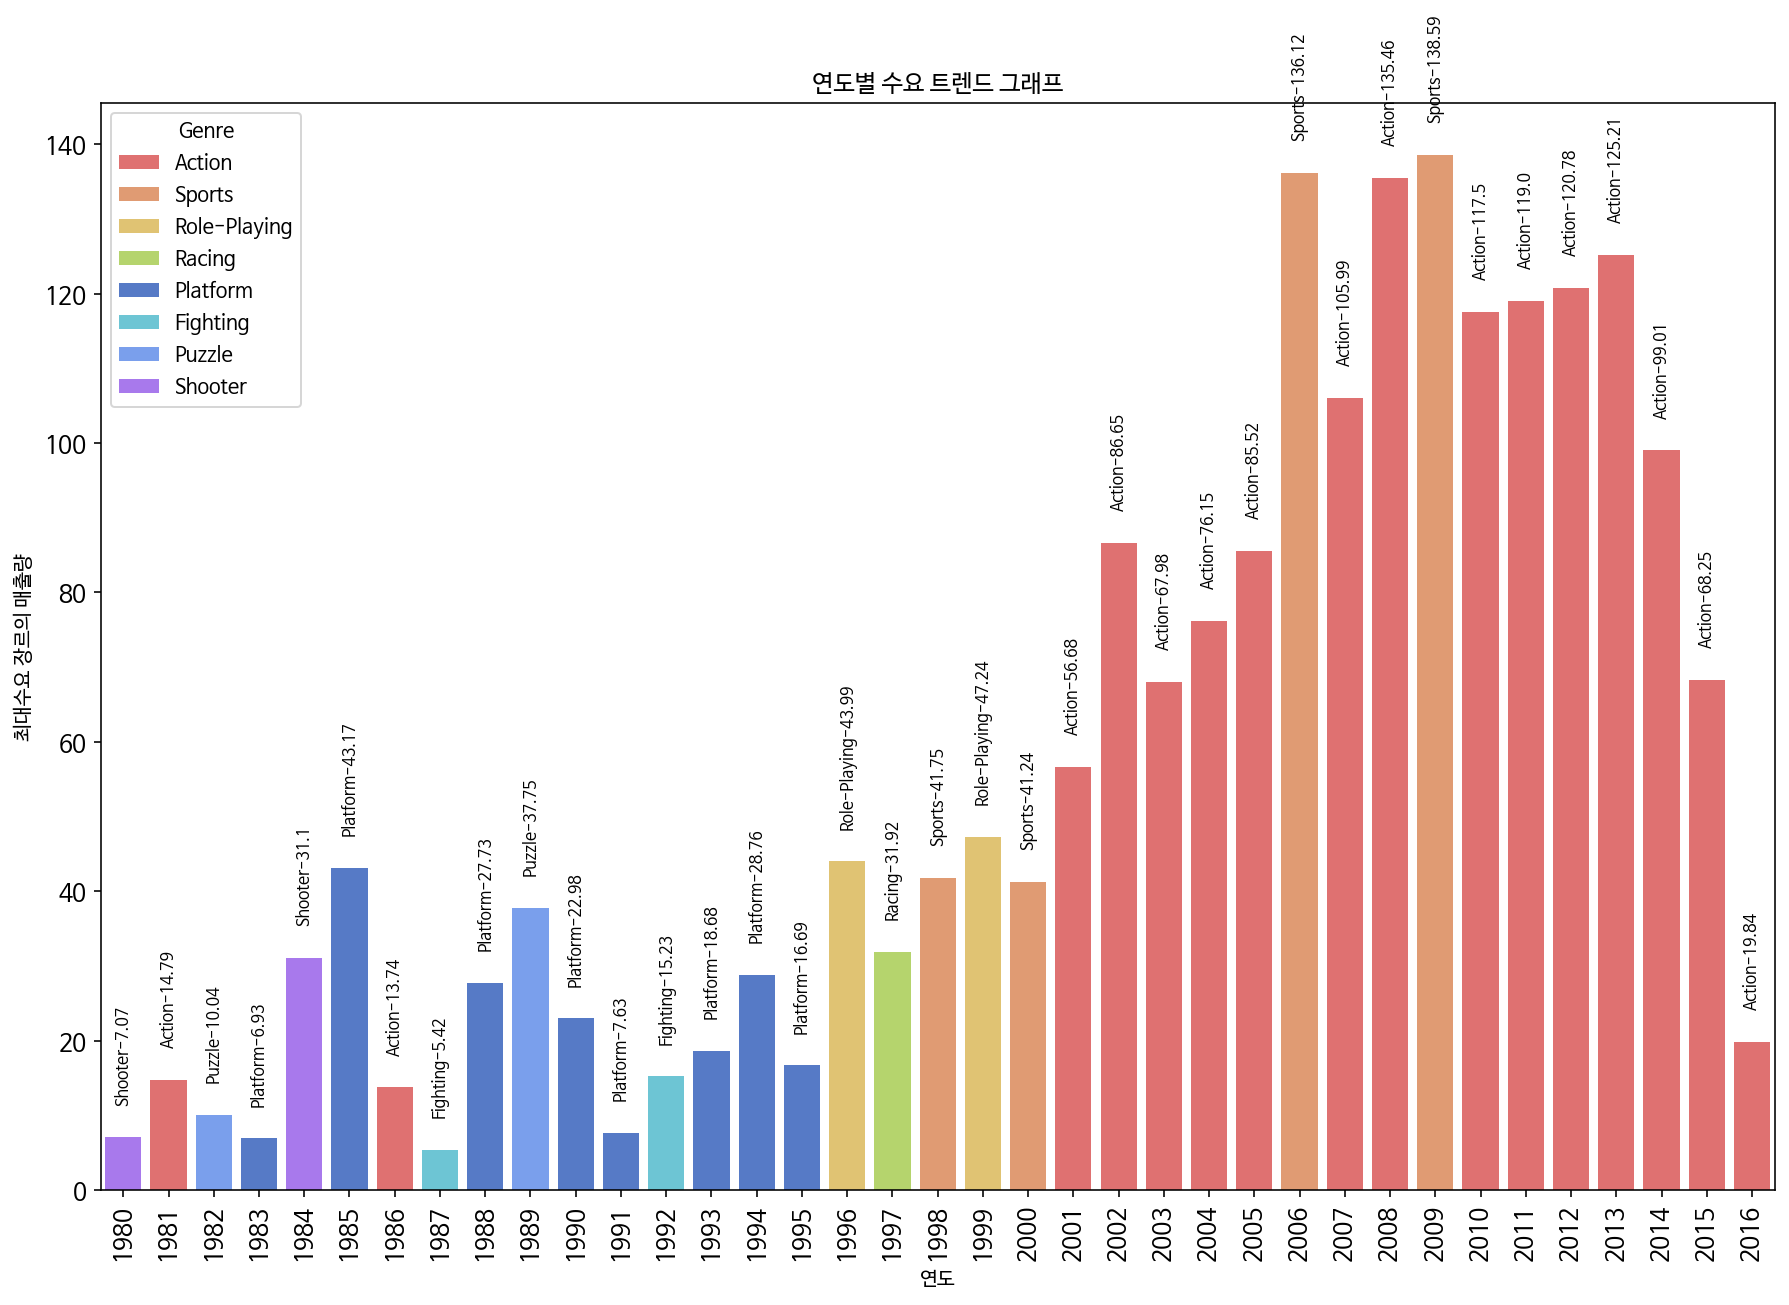

In [9]:
# 연도별 수요 트렌드 그래프: 연도별 흐름을 보여주기 위해서 barplot을 이용했다.
genre = year_max_sales['Genre'].values
plt.figure(figsize=(15,10))

colors = ["#F15F5F"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Action'])
colors = ["#F29661"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Sports'])
colors = ["#F2CB61"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Role-Playing'])
colors = ["#BCE55C"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Racing'])
colors = ["#4374D9"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Platform'])
colors = ["#5CD1E5"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Fighting'])
colors = ["#6799FF"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Puzzle'])
colors = ["#A566FF"]
sns.set_palette(sns.color_palette(colors))
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Shooter'])


cnt = 0
for value in year_max_sales['Sales_sum']:
    year_barplot.text(x=cnt, y=value + 5, s=str(genre[cnt] + '-' + str(round(value,2))),
            color='black', size=8, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('연도별 수요 트렌드 그래프')
plt.xlabel('연도')
plt.ylabel('최대수요 장르의 매출량')
plt.show()
# 수요 부분에서 최근 트렌드는 Action 장르임을 알 수 있다.

In [10]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
# 주제에 맞게끔 최근 10년간 판매량 Top 100을 선정
sales_top100 = df[df.Year > 2010].sort_values(by='Sales_sum' ,ascending=False)
sales_top100 = sales_top100.head(100).reset_index(drop=True)
sales_top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
...,...,...,...,...,...,...,...,...,...,...
95,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,Konami Digital Entertainment,1.08,1.35,0.48,0.47,3.38
96,Assassin's Creed IV: Black Flag,X360,2013,Action,Ubisoft,1.90,1.14,0.01,0.29,3.34
97,Mario Party 9,Wii,2012,Misc,Nintendo,1.15,1.17,0.76,0.24,3.32
98,Destiny,XOne,2014,Shooter,Activision,2.13,0.92,0.00,0.23,3.28


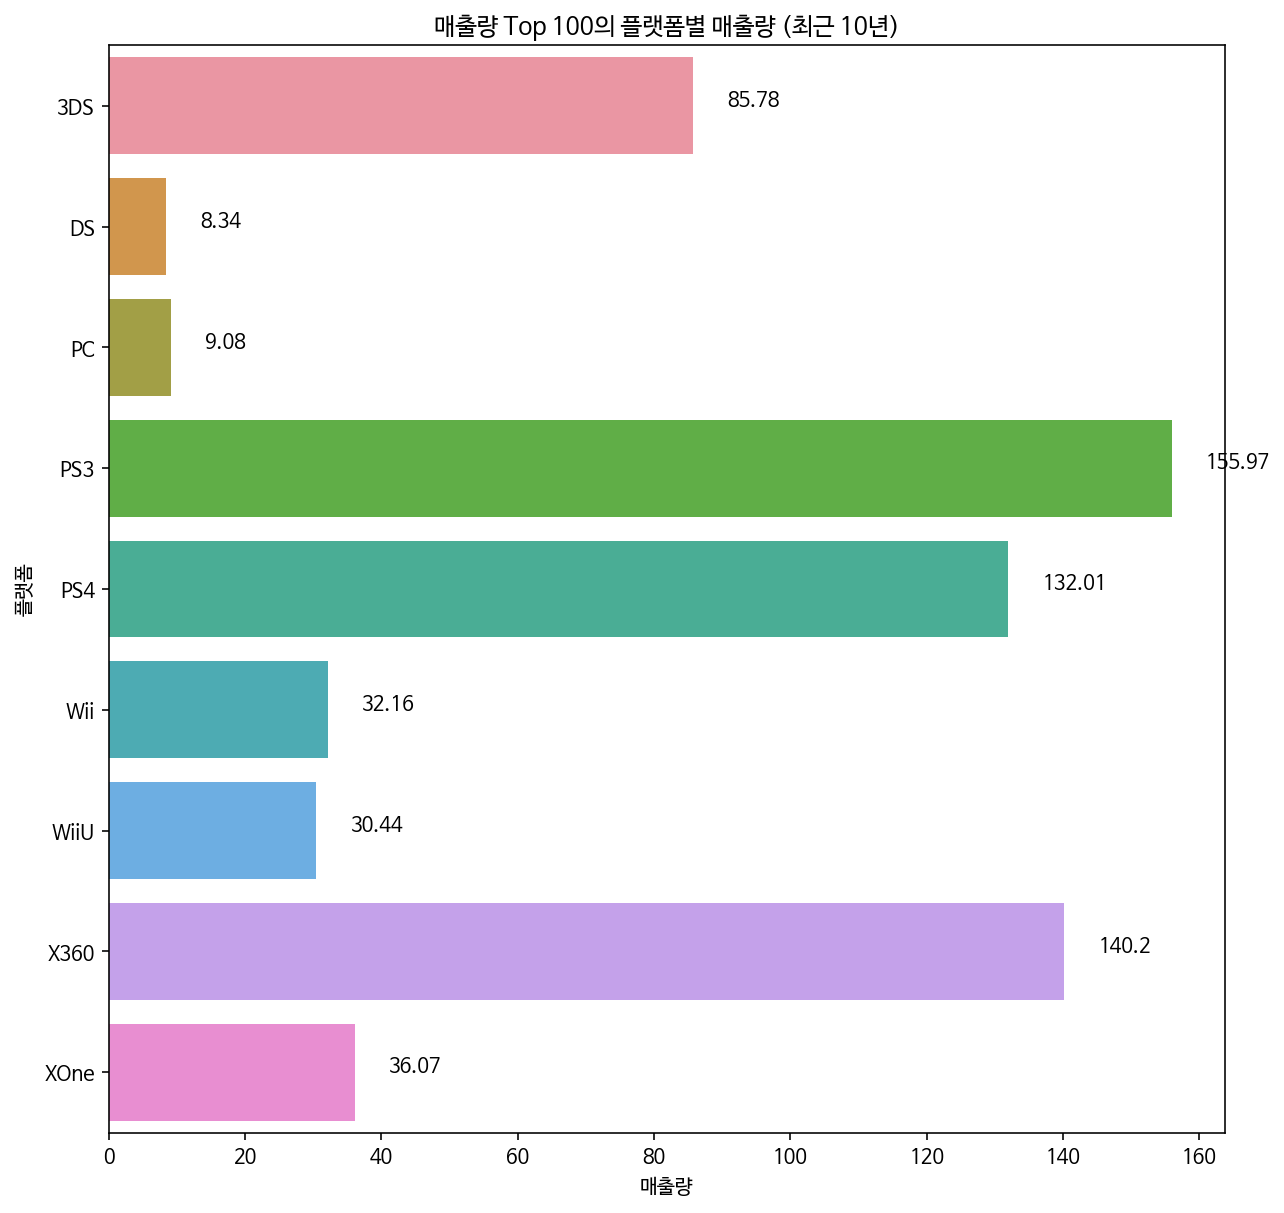

In [11]:
# top100 Platform 그래프
top100_platform = sales_top100.groupby(['Platform'])['Sales_sum'].sum().reset_index()
platform = top100_platform['Platform'].values
plt.figure(figsize=(10, 10))
top100_platform_sales = sns.barplot(x ='Sales_sum', y='Platform', data=top100_platform)
cnt = 0
for value in top100_platform['Sales_sum']:
    top100_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('매출량 Top 100의 플랫폼별 매출량 (최근 10년)')
plt.xlabel('매출량')
plt.ylabel('플랫폼')
plt.show()
# 최근 10년간 출고량이 많았던 플랫폼은 PS3,PS4,X360이다.

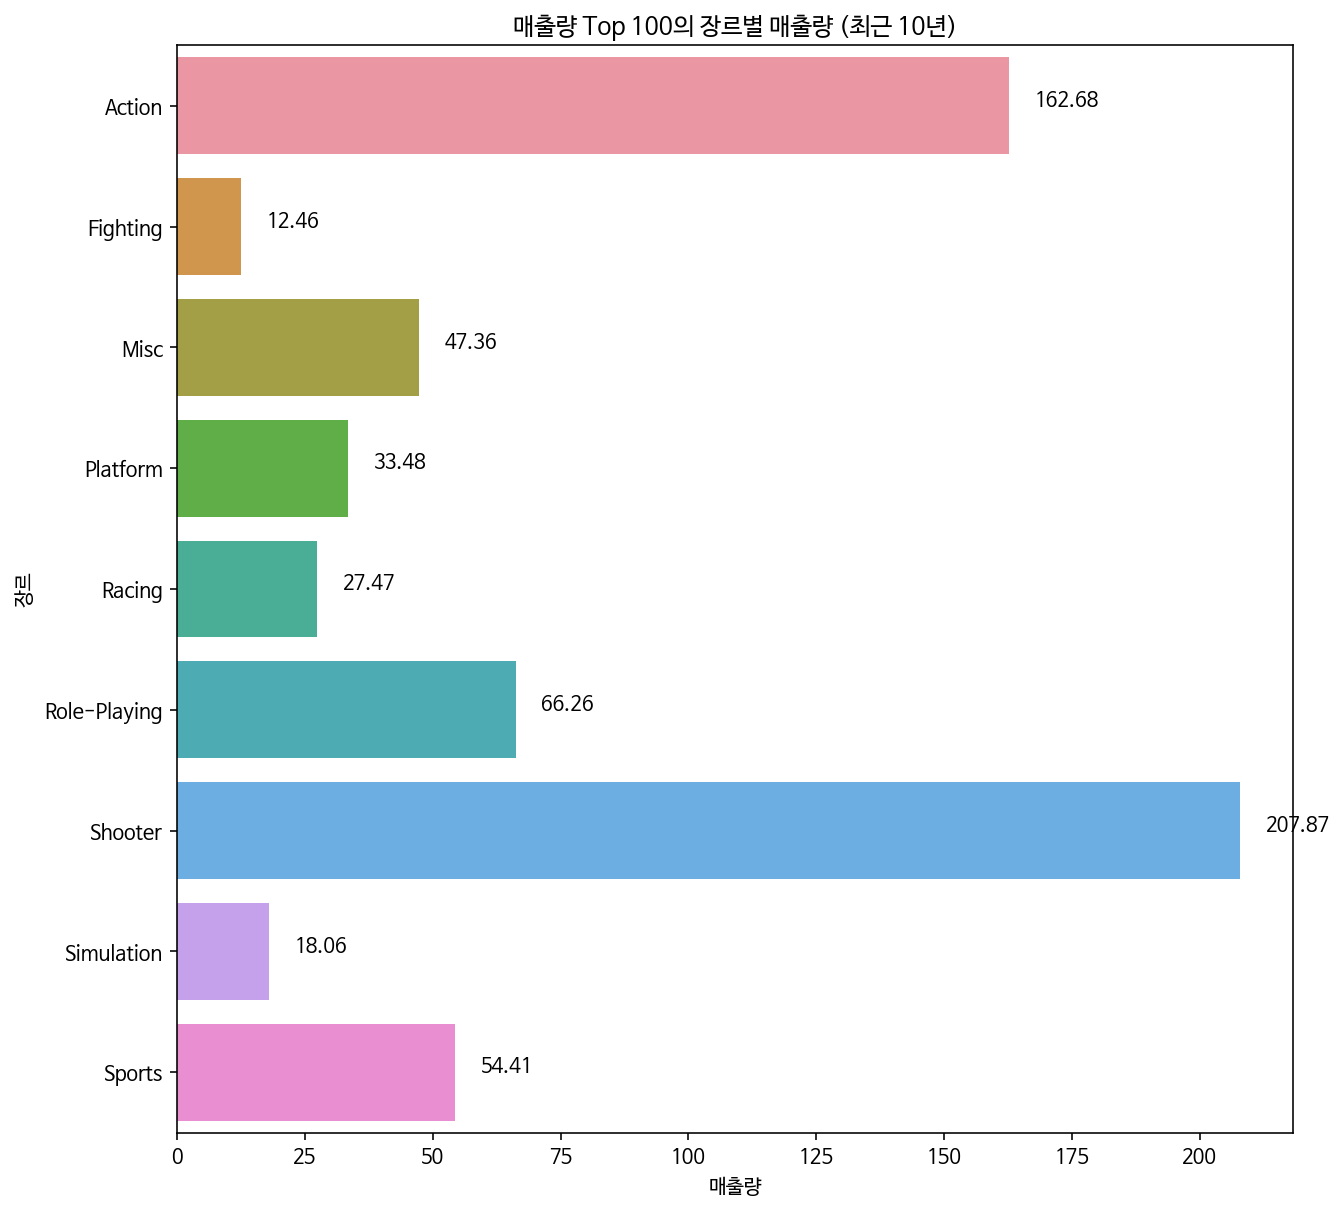

In [12]:
# top100 Genre 그래프
top100_genre = sales_top100.groupby(['Genre'])['Sales_sum'].sum().reset_index()
genre = top100_genre['Genre'].values
plt.figure(figsize=(10, 10))
top100_genre_sales = sns.barplot(x ='Sales_sum', y='Genre', data=top100_genre)
cnt = 0
for value in top100_genre['Sales_sum']:
    top100_genre_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('매출량 Top 100의 장르별 매출량 (최근 10년)')
plt.xlabel('매출량')
plt.ylabel('장르')
plt.show()
# 최근 10년간 출고량이 많았던 장르는 Shooter,Action,Sports 이다.

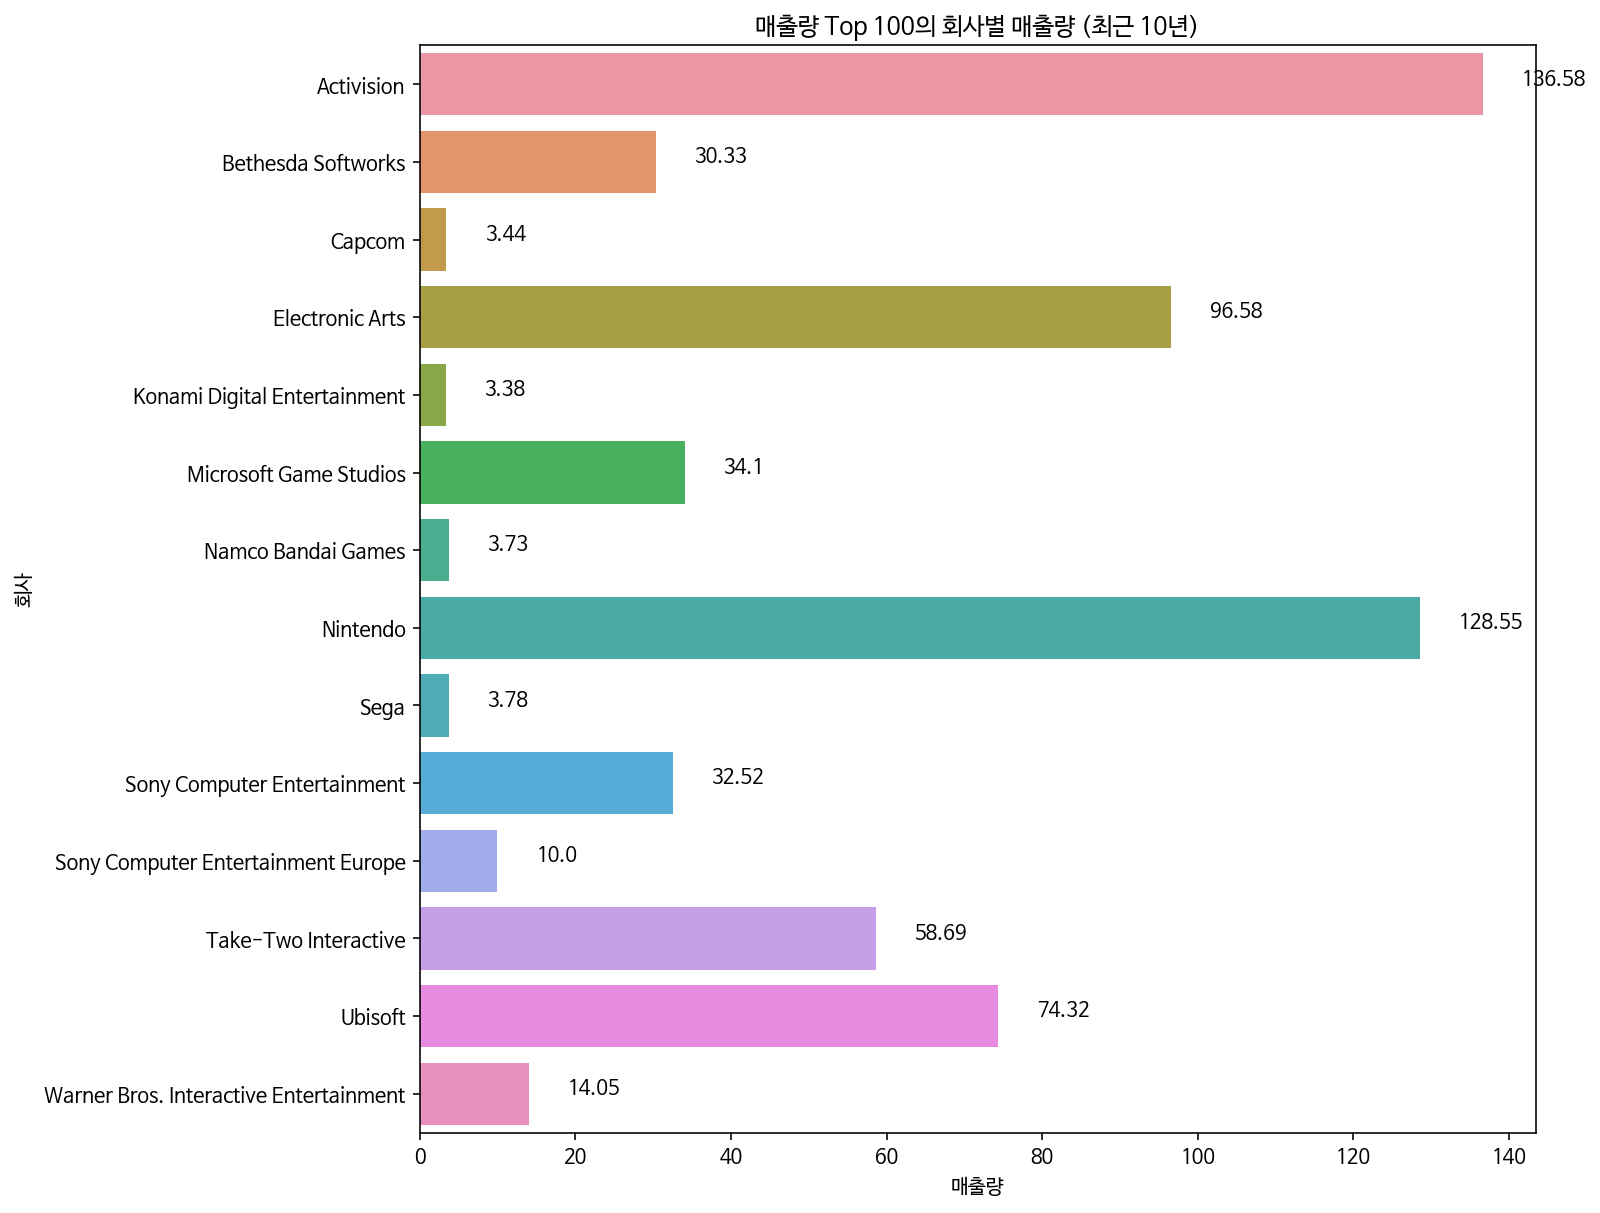

In [13]:
# top100 Publisher 그래프
top100_publisher = sales_top100.groupby(['Publisher'])['Sales_sum'].sum().reset_index()
publisher = top100_publisher['Publisher'].values
plt.figure(figsize=(10, 10))
top100_publisher_sales = sns.barplot(x ='Sales_sum', y='Publisher', data=top100_publisher)
cnt = 0
for value in top100_publisher['Sales_sum']:
    top100_publisher_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('매출량 Top 100의 회사별 매출량 (최근 10년)')
plt.xlabel('매출량')
plt.ylabel('회사')
plt.show()
# 최근 10년간 출고량이 많았던 회사는 Activision,Nintendo,Electronic Arts 이다.

In [14]:
# 추가적인 분석
# 회사의 데이터가 한정되었다는 가정하에 진행하자 o
# 연도별 유행 장르를 결정 o
# 장르 TOP3 결정 
# Platform o
# 연도별 플랫폼 출시 비율 그래프 형태 (꺾은선) o
# 같은 콘솔 계열로 묶어서 데이터를 가져오자 o
# 지역별로 매출을 조사하고 거기서 출고량이 많은 회사를 모티브하겠다
# 어떤 장르로 어떤 플랫폼에서 어떤 지역을 대상으로 회사의 홍보전략에 맞춰서 게임을 설계하겠다.

# 해야할 것
# 2.플랫폼의 독점에 관해서도 고려해야한다. (세모)
# 3.Platform, Year, Publisher 를 이용하여 Genre의 Null값을 대치하는 방법은 어떨까? (세모)
# 5.1등뿐만 아니라 2,3등도 비교해보자 (O)
# 6.2017,2020 데이터는 없애버리자 (O)

In [15]:
Genre_filter = (df.Genre == 'Action') & (df.Year > 2010) # 조건식 작성
df_action = df.loc[Genre_filter].reset_index(drop = True)
df_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
1,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03,0.33
2,Rango: The Video Game,Wii,2011,Action,Electronic Arts,0.08,0.04,0.00,0.01,0.13
3,Disney Universe,Wii,2011,Action,Disney Interactive Studios,0.67,0.30,0.00,0.10,1.07
4,Samurai Warriors Chronicles 3,3DS,2014,Action,Tecmo Koei,0.00,0.00,0.08,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...
1202,Yakuza,PS3,2012,Action,Sega,0.00,0.00,0.11,0.00,0.11
1203,Kimikare: New Semester,PSP,2012,Action,Idea Factory,0.00,0.00,0.02,0.00,0.02
1204,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
1205,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27


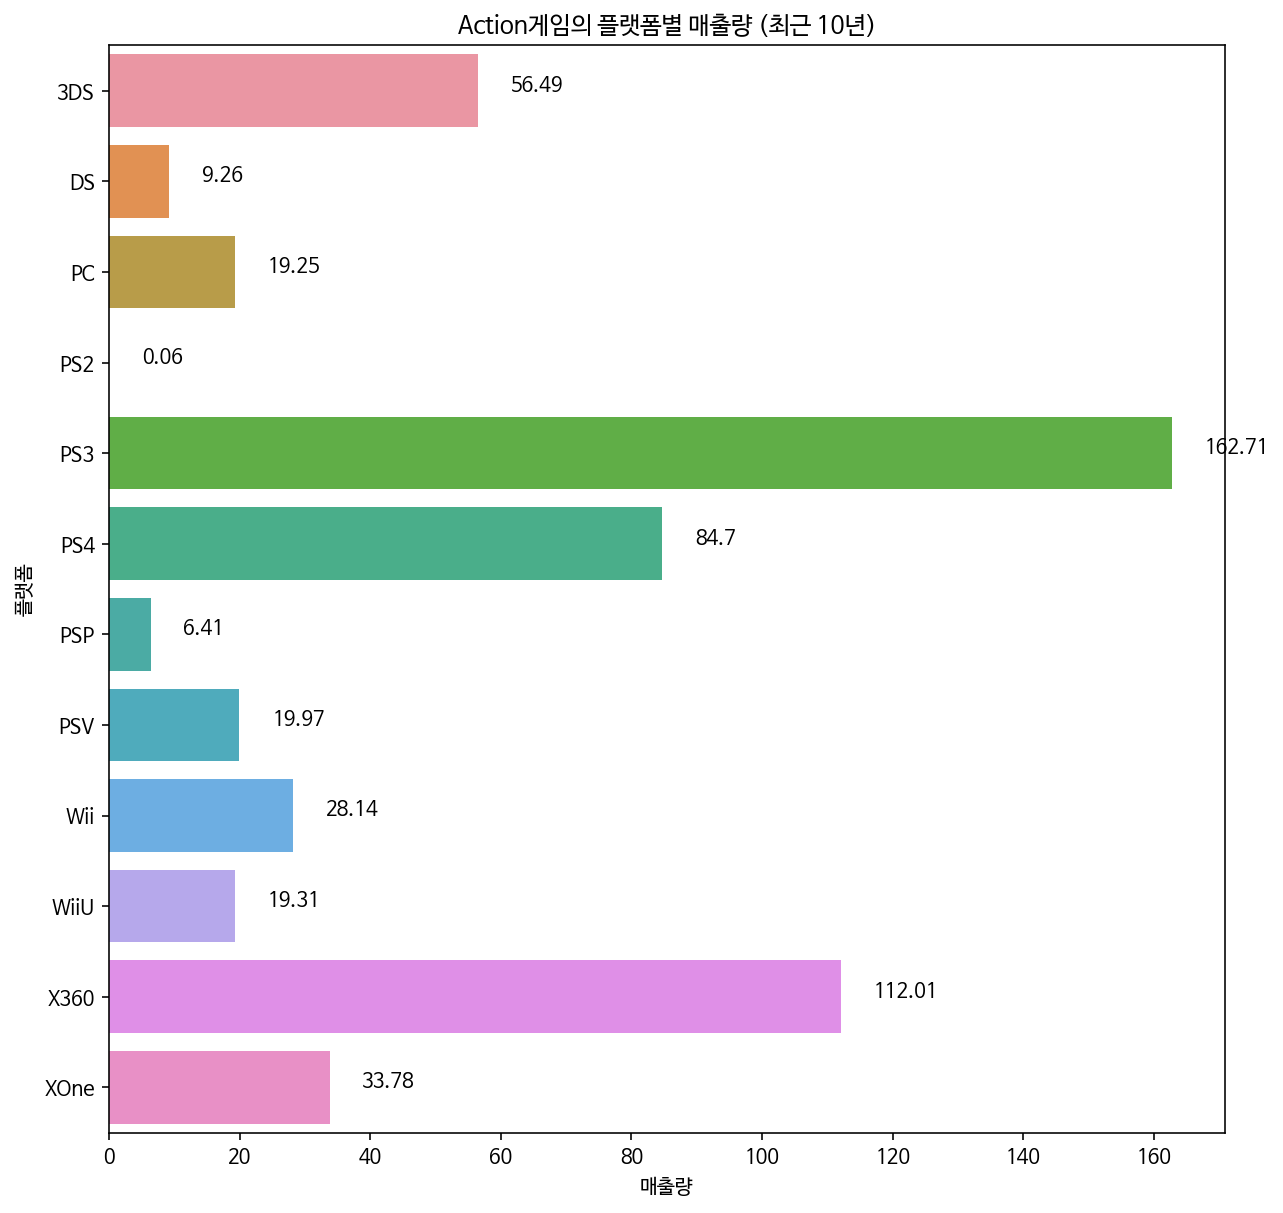

In [16]:
df_action_platform = df_action.groupby(['Platform'])['Sales_sum'].sum().reset_index()
platform = df_action_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_action_platform_sales = sns.barplot(x ='Sales_sum', y='Platform', data=df_action_platform)
cnt = 0
for value in df_action_platform['Sales_sum']:
    df_action_platform_sales.text(x=value + 5, y=cnt, s=str(round(value,2)),
            color='black', size=10)
    cnt+=1
plt.title('Action게임의 플랫폼별 매출량 (최근 10년)')
plt.xlabel('매출량')
plt.ylabel('플랫폼')
plt.show()

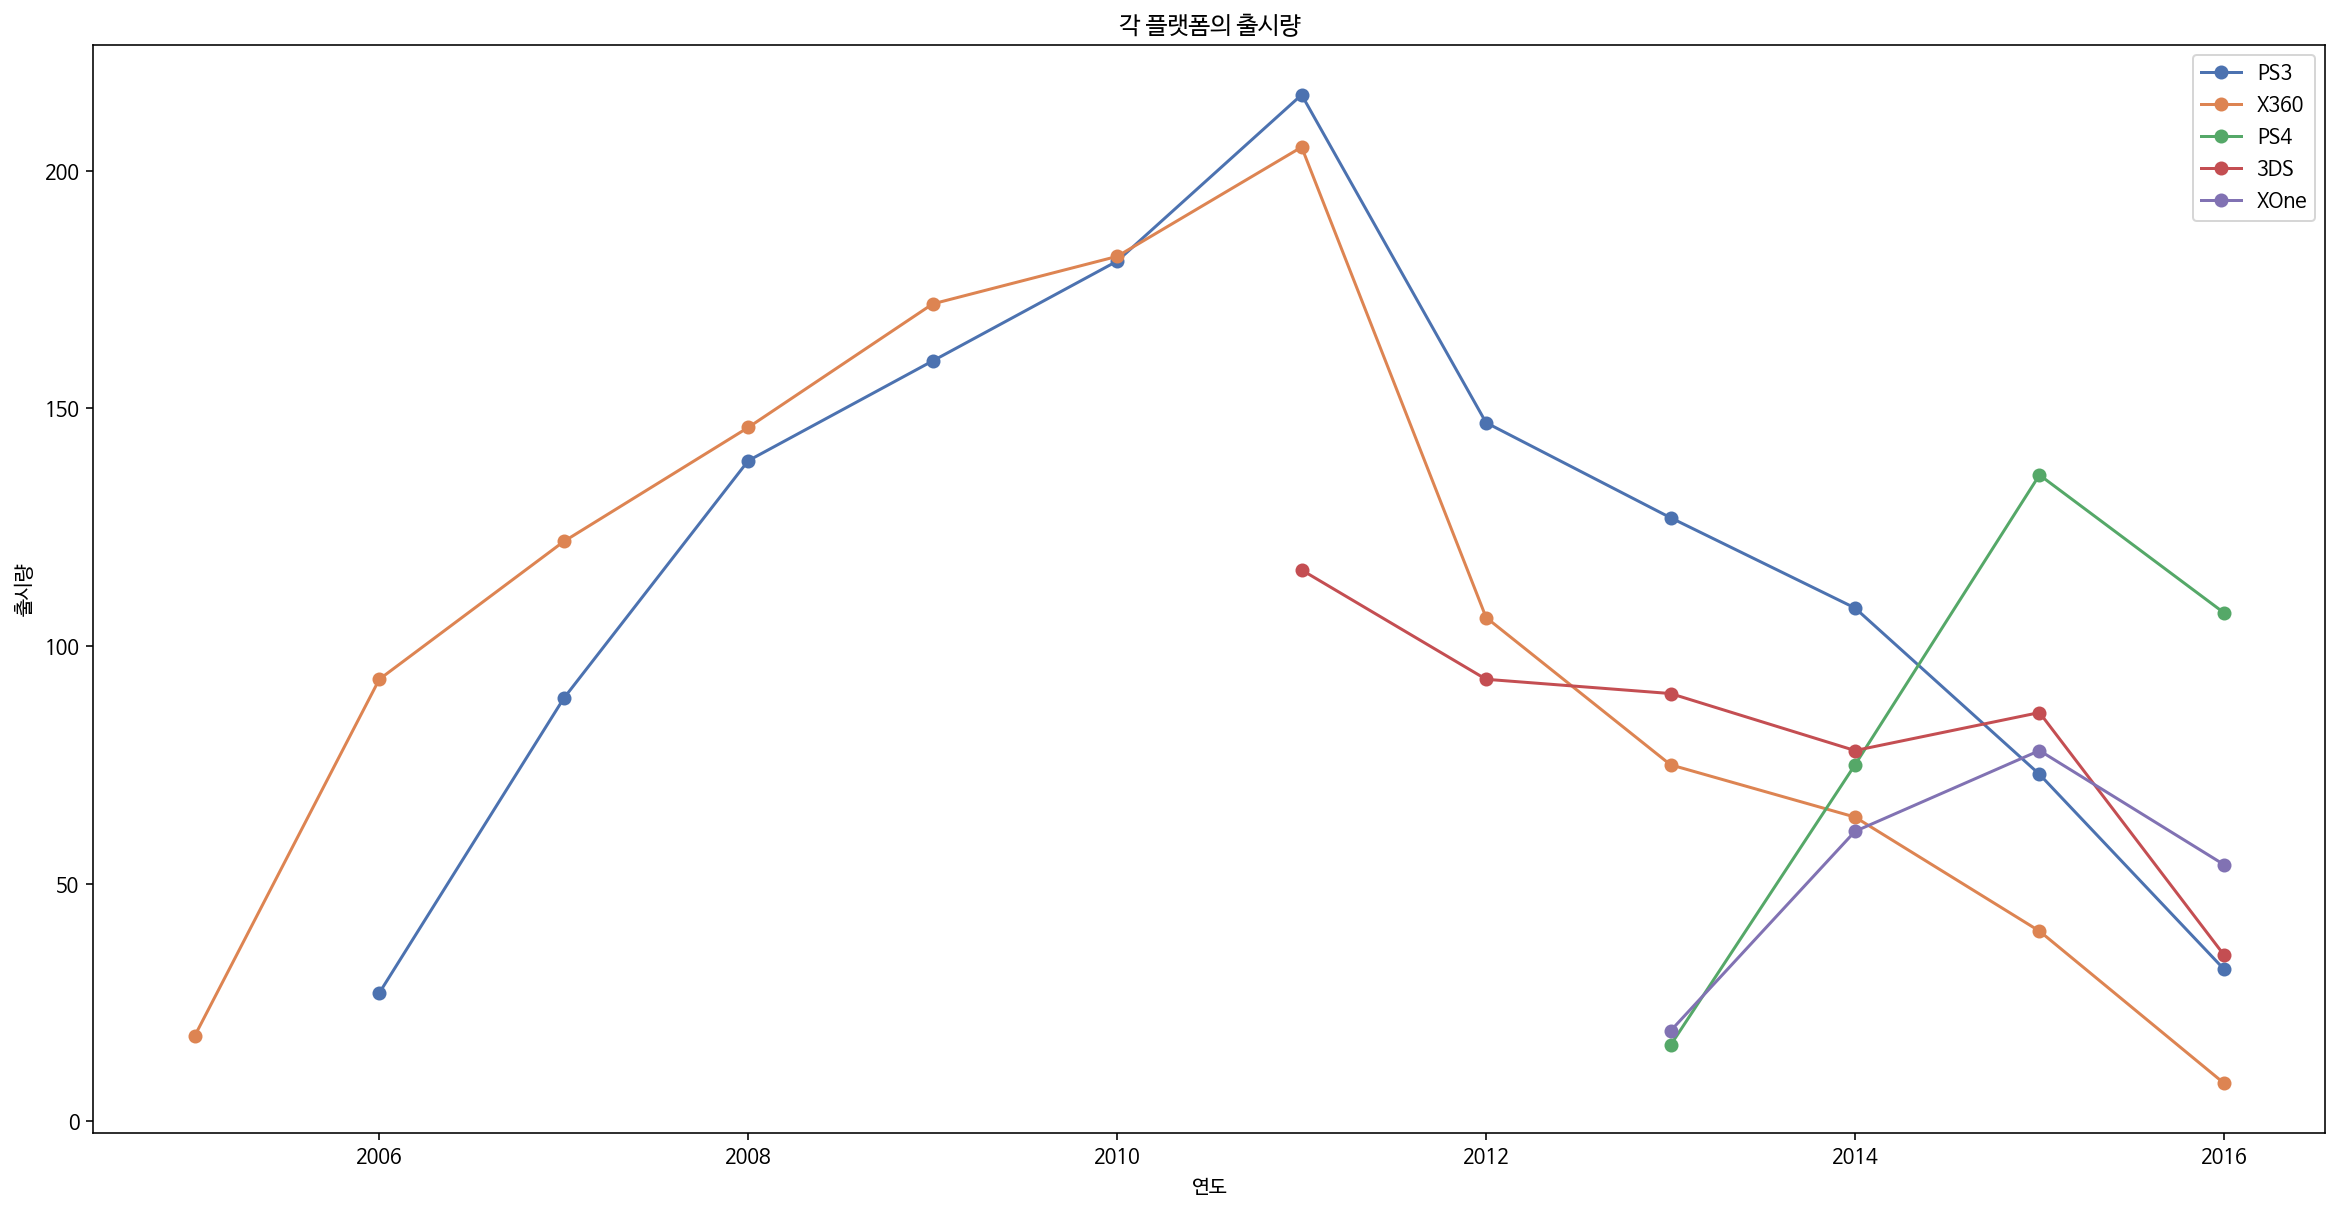

In [17]:
sns.set_palette('deep')

# 연도별 플랫폼 출시 비율 그래프 형태 (꺾은선)
plt.figure(figsize=(20, 10))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

PS3_filter = df.Platform == 'PS3' # 조건식 작성
df_PS3 = df.loc[PS3_filter]
df_PS3 = df_PS3.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_PS3['Year'], df_PS3['Count'],marker='o',label = 'PS3')

X360_filter = df.Platform == 'X360' # 조건식 작성
df_X360 = df.loc[X360_filter]
df_X360 = df_X360.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_X360['Year'], df_X360['Count'],marker='o',label = 'X360')

PS4_filter = df.Platform == 'PS4' # 조건식 작성
df_PS4 = df.loc[PS4_filter]
df_PS4 = df_PS4.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_PS4['Year'], df_PS4['Count'],marker='o',label = 'PS4')

DS3_filter = df.Platform == '3DS' # 조건식 작성
df_3DS = df.loc[DS3_filter]
df_3DS = df_3DS.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_3DS['Year'], df_3DS['Count'],marker='o',label = '3DS')

XOne_filter = df.Platform == 'XOne' # 조건식 작성
df_XOne = df.loc[XOne_filter]
df_XOne = df_XOne.groupby(['Year', 'Platform']).size().reset_index(name='Count')
plt.plot(df_XOne['Year'], df_XOne['Count'],marker='o',label = 'XOne')
plt.legend()

plt.title('각 플랫폼의 출시량')
plt.xlabel('연도')
plt.ylabel('출시량')
plt.show()

# X360과 PS3의 경우 콘솔 시장의 변화로 인해 수가 줄어들고 있다.
# 따라서 PS4를 Platform으로 채택한다.

In [18]:
Platform_filter = (df_action.Platform == 'PS4') # 조건식 작성
df_action_ps4 = df_action.loc[Platform_filter].reset_index(drop = True)
df_action_ps4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,0.05,0.04,0.02,0.15
1,Let's Sing 2016,PS4,2015,Action,FuRyu Corporation,0.02,0.00,0.00,0.01,0.03
2,Terraria,PS4,2014,Action,505 Games,0.00,0.05,0.01,0.01,0.07
3,Hitman (2016),PS4,2016,Action,Square Enix,0.00,0.04,0.00,0.01,0.05
4,Devil May Cry 4,PS4,2015,Action,Capcom,0.01,0.00,0.08,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...
116,TrackMania Turbo,PS4,2016,Action,Ubisoft,0.03,0.24,0.00,0.05,0.32
117,Kamen Rider: Battride War Genesis,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
118,Final Fantasy XIV: Heavensward,PS4,2015,Action,Square Enix,0.00,0.05,0.06,0.01,0.12
119,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01


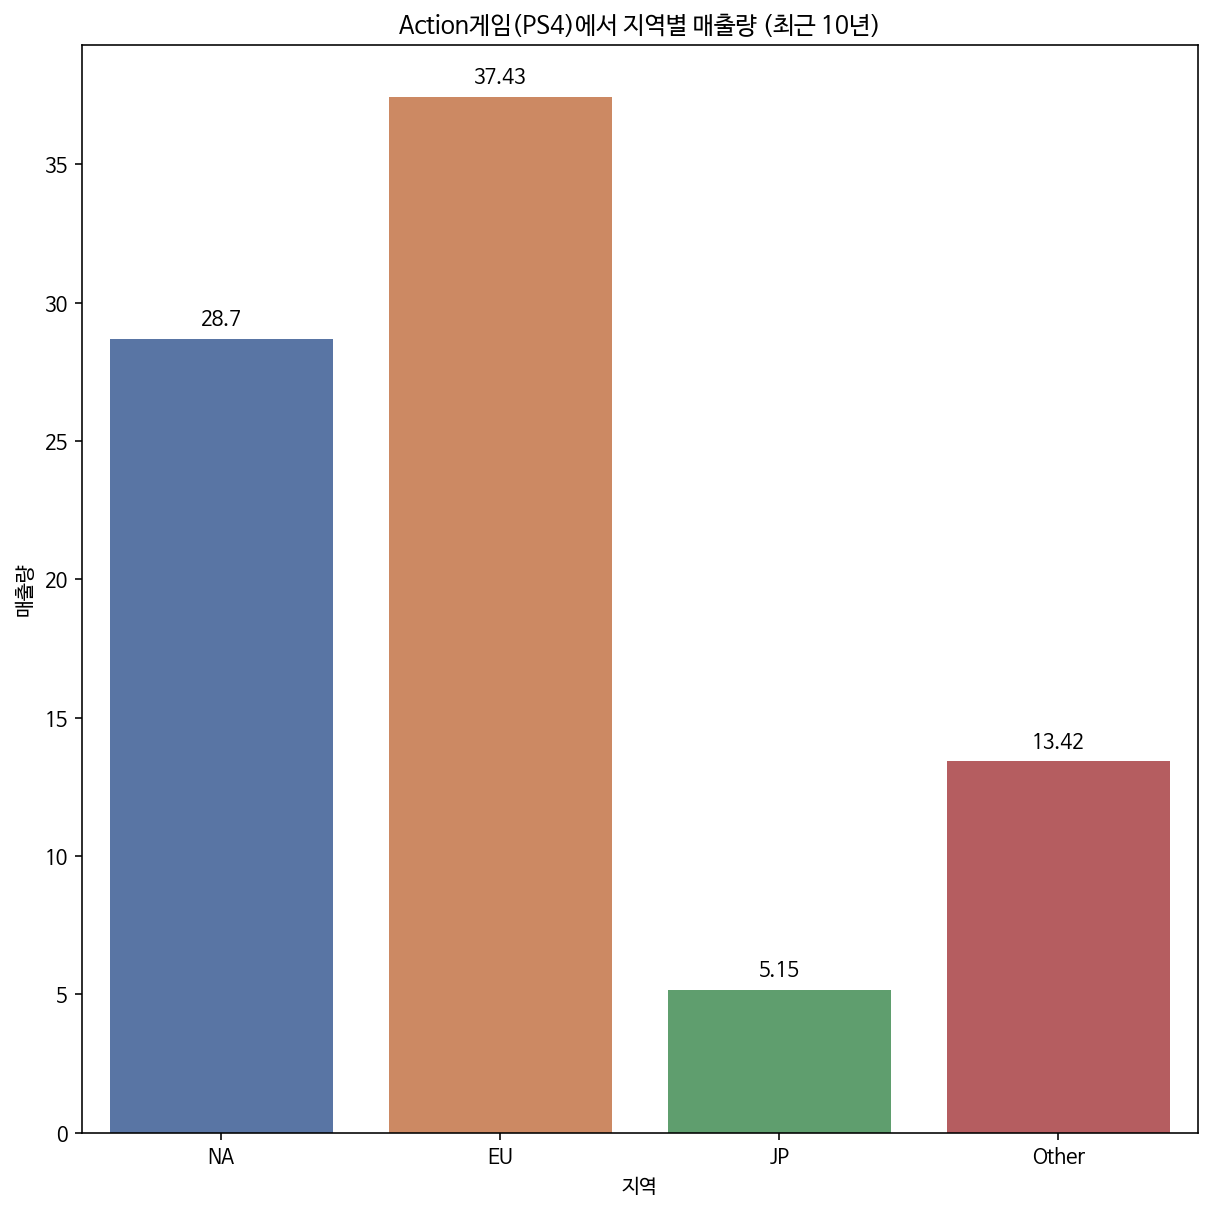

In [19]:
plt.figure(figsize=(10,10))
locate_NA = df_action_ps4['NA_Sales'].sum()
locate_EU = df_action_ps4['EU_Sales'].sum()
locate_JP = df_action_ps4['JP_Sales'].sum()
locate_Other = df_action_ps4['Other_Sales'].sum()
locate_group = pd.DataFrame({'locate':['NA','EU','JP','Other'],'Sales':[locate_NA, locate_EU,locate_JP,locate_Other]})
locate_barplot = sns.barplot(x='locate', y='Sales',data=locate_group)
Sales = locate_group['Sales'].values
cnt = 0
for value in locate_group['Sales']:
    locate_barplot.text(x=cnt, y=value+0.5, s=str(str(round(value,2))),
            color='black', size=10, ha='center')
    cnt+=1
plt.title('Action게임(PS4)에서 지역별 매출량 (최근 10년)')
plt.xlabel('지역')
plt.ylabel('매출량')
plt.show()
# EU를 대상으로한 게임을 설계한다.

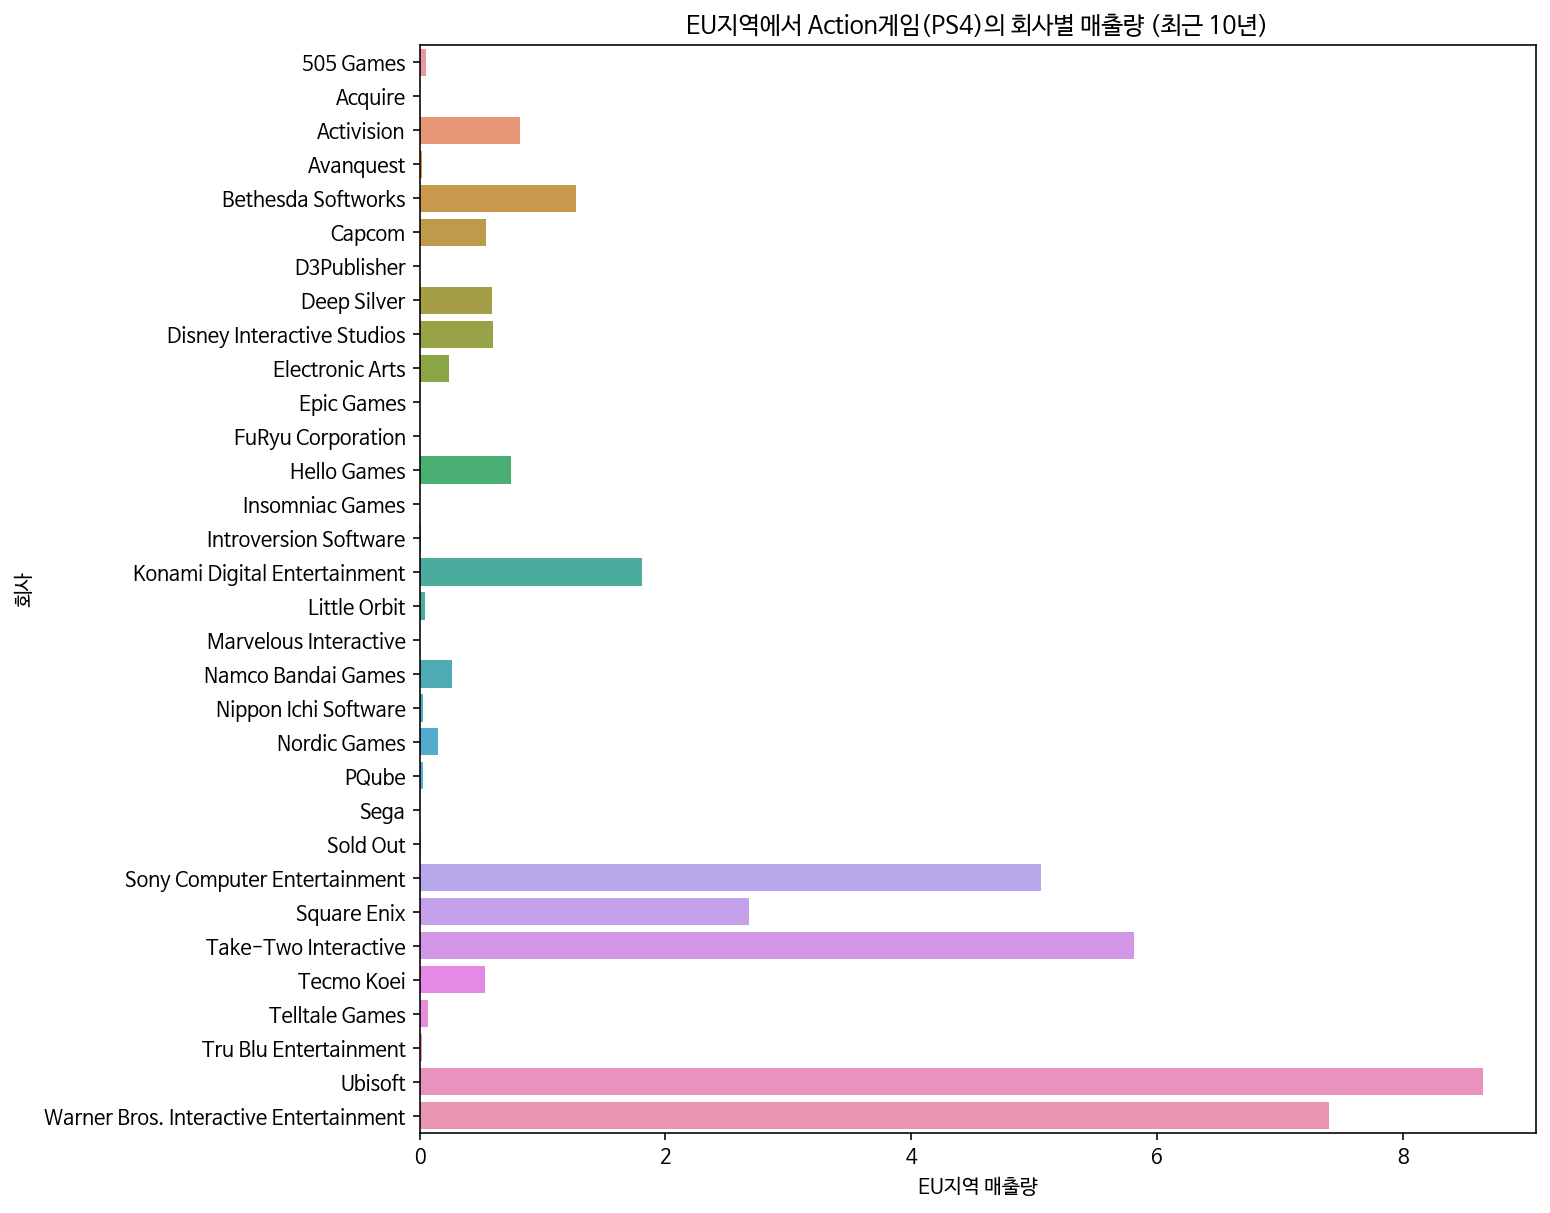

In [20]:
# 연도별 장르 갯수 추출
df_action_ps4_pub = df_action_ps4.groupby(['Publisher'])['EU_Sales'].sum().reset_index()
plt.figure(figsize=(10, 10))
res_barplot = sns.barplot(x='EU_Sales', y='Publisher',data=df_action_ps4_pub)
plt.title('EU지역에서 Action게임(PS4)의 회사별 매출량 (최근 10년)')
plt.xlabel('EU지역 매출량')
plt.ylabel('회사')
plt.show()
# Ubisoft를 모티브로 하겠다.

In [21]:
# Action 장르로 PS4 플랫폼에서 EU지역을 대상으로 Ubisoft회사를 모티브로 하여 게임을 설계하겠다.